In [1]:
import numpy
import pandas

In [2]:
dataFrame = pandas.read_csv(".\Data\kaggle_reddit-insult-classification-data.csv")

In [3]:
Data = dataFrame['title'].to_numpy()
label = dataFrame['is_nsfw'].to_numpy()

labels = numpy.zeros(label.shape)
for i in range(0 , len(label)):
    if label[i] == True :
        labels[i] = 1 


TrainSet , devSet = Data[ : 100000] , Data[100000 : 140000]
TrainLabel , devLabel = labels[ : 100000] , labels[100000 : 140000]


In [4]:
import tensorflow as tf

In [5]:
vocabSize = 40000
embeddingDim = 16
maxLength = 32
truncType = paddingType = 'post'
oovTok = "<OOV>"
trainingSize = 100000

In [6]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocabSize  , oov_token=oovTok)
tokenizer.fit_on_texts(TrainSet)

In [7]:
trainSequence = tokenizer.texts_to_sequences(TrainSet)
trainPadded = tf.keras.preprocessing.sequence.pad_sequences(trainSequence , maxLength , padding= paddingType , truncating= truncType)

devSequence = tokenizer.texts_to_sequences(devSet)
devPadded = tf.keras.preprocessing.sequence.pad_sequences(devSequence , maxLength , padding= paddingType , truncating= truncType)


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabSize , embeddingDim , input_length= maxLength),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64 , activation="leaky_relu"),
    tf.keras.layers.Dense(32 , activation="leaky_relu"),
    tf.keras.layers.Dense(1 , activation="sigmoid"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 16)            640000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 643,201
Trainable params: 643,201
Non-trainable params: 0
__________________________________________________

In [9]:
model.compile(optimizer="adam" , loss=tf.keras.losses.binary_crossentropy , metrics="acc")

In [10]:
hist = model.fit(trainPadded , TrainLabel , validation_data=(devPadded , devLabel) , epochs= 12 )

Epoch 1/12
3125/3125 [==============================] - 13s 4ms/step - loss: 0.2111 - acc: 0.9164 - val_loss: 0.2578 - val_acc: 0.8970
Epoch 2/12
3125/3125 [==============================] - 13s 4ms/step - loss: 0.1298 - acc: 0.9518 - val_loss: 0.2072 - val_acc: 0.9258
Epoch 3/12
3125/3125 [==============================] - 12s 4ms/step - loss: 0.1099 - acc: 0.9596 - val_loss: 0.1969 - val_acc: 0.9279
Epoch 4/12
3125/3125 [==============================] - 13s 4ms/step - loss: 0.0981 - acc: 0.9634 - val_loss: 0.2166 - val_acc: 0.9232
Epoch 5/12
3125/3125 [==============================] - 13s 4ms/step - loss: 0.0897 - acc: 0.9663 - val_loss: 0.1930 - val_acc: 0.9348
Epoch 6/12
3125/3125 [==============================] - 13s 4ms/step - loss: 0.0835 - acc: 0.9682 - val_loss: 0.1933 - val_acc: 0.9386
Epoch 7/12
3125/3125 [==============================] - 13s 4ms/step - loss: 0.0778 - acc: 0.9700 - val_loss: 0.2164 - val_acc: 0.9297
Epoch 8/12
3125/3125 [==============================] -

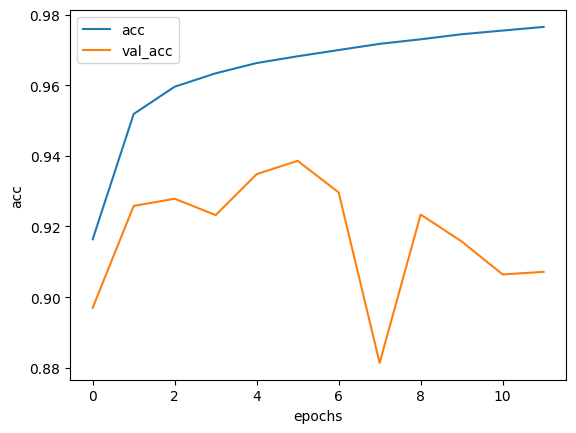

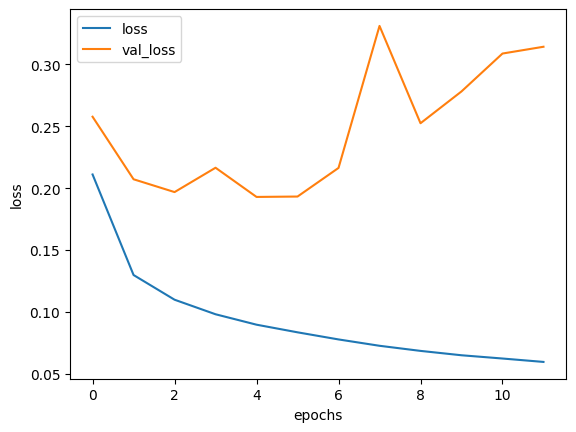

In [18]:
import matplotlib.pyplot as plt

def plot_Graph(history , String):
    plt.plot(history.history[String])
    plt.plot(history.history['val_'  + String])
    plt.xlabel("epochs")
    plt.ylabel(String)
    plt.legend([String , 'val_'  + String])
    plt.show()


plot_Graph(hist , "acc")
plot_Graph(hist , "loss")